# Pdf of the logarithm of a uniform distribution

$x$ is a sample with a unifrom distribution between 0.1 and 10.

$y$ is the base 10 logarithm of $x$: $y = log_{10}{x}$

**What is the $p(y)$?**

From the law of pdf transformation:

$$p(y) = |\frac{dy}{dx}|^{-1}p(x)$$

In this case:
- $p(x) = \frac{1}{10 - 0.1}$
- $\frac{dy}{dx} = \frac{1}{x \ln{10}}$

Therefore:
$$p(y) = \frac{x \ln{10}}{10 - 0.1}$$

$$p(y) = \frac{10^{y} \ln{10}}{10 - 0.1}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000    #length of the sample

a = 0.1      #extremes of the uniform distribution
b = 10

x = np.random.uniform(a, b, size=N) #extraction of x

y = np.log10(x)  #y sample

Text(0, 0.5, '$p(y)$')

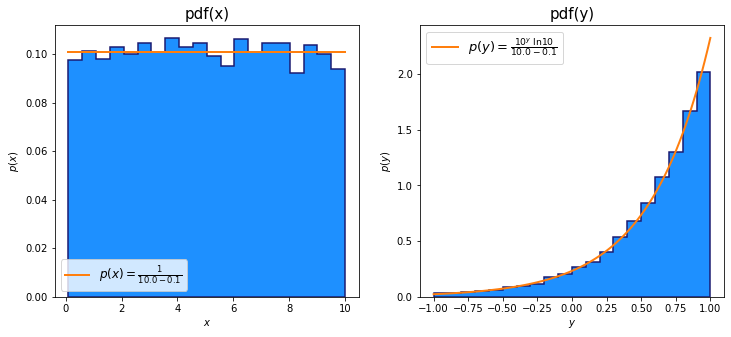

In [2]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

xaxis = np.linspace(a,b)

uniform_x = 1/(b-a)    #uniform distribution    
ax[0].hist(x, density = True, bins=20, color='dodgerblue', edgecolor='midnightblue', histtype='stepfilled', lw=1.5)
ax[0].plot(xaxis, uniform_x+0*xaxis, c='tab:orange', lw=2, label='$p(x) = \\frac{1}{%.1f - %.1f}$' %(b, a))
ax[0]. set_title("pdf(x)", fontsize=15)
ax[0].legend(fontsize=12)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$p(x)$')

xaxis1 = np.linspace(np.min(y), np.max(y), 100)
log_dist = 10**(xaxis1)*np.log(10)/(b-a)     #pdf(y)
ax[1].hist(y, density = True, bins=20, color='dodgerblue', edgecolor='midnightblue', histtype='stepfilled', lw=1.5)
ax[1].plot(xaxis1, log_dist, c='tab:orange', lw=2, label = '$p(y)= \\frac{10^{y} \ \ln{10}}{%.1f - %.1f}$' %(b, a))
ax[1].set_title("pdf(y)", fontsize=15)
ax[1].legend(fontsize=13)
ax[1].set_xlabel('$y$')
ax[1].set_ylabel('$p(y)$')

In [3]:
#mean estimation
mean_y = np.mean(y)
log_mean_x = np.log10(np.mean(x))
print('The mean of y is: %.4f \nThe value of log(mean(x)) is: %.4f' %(mean_y, log_mean_x))

#median estimation
median_y = np.median(y)
log_median_x = np.log10(np.median(x))
print('\nThe median of y is: %.4f \nThe value of log(median(x)) is: %.4f' %(median_y, log_median_x))

The mean of y is: 0.5860 
The value of log(mean(x)) is: 0.7018

The median of y is: 0.6996 
The value of log(median(x)) is: 0.6996


The median value represents a more robust estimator!

In [4]:
#standard deviation of a uniform distribution
print('The sample standard deviation of the uniform distribution is : %.3f' %np.std(x, ddof=1))
print('The expected standard deviation is: %.3f'  %((10-0.1)/np.sqrt(12)))

The sample standard deviation of the uniform distribution is : 2.835
The expected standard deviation is: 2.858


In [5]:
#comparing standard deviation and sigmaG of the two distribution
from astroML.stats import sigmaG
print('std(y) = %.3f \nstd(log10(x)) = %.3f' %(np.std(y, ddof=1), np.log10(np.std(x, ddof=1))))
print('\nsigmaG(y) = %.3f \nsigmaG(log10(x)) = %.3f' %(sigmaG(y), sigmaG(np.log10(x))))

std(y) = 0.382 
std(log10(x)) = 0.453

sigmaG(y) = 0.339 
sigmaG(log10(x)) = 0.339


$\sigma_{G}$ seems a more robust estimator for the width of a distribution when we are transforming variables.